# **Absorption Kinetics**

In [1]:
from IPython.display import display, Math
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots
pio.renderers.default = 'png'

import Module_

## **Exercise 1**  
The following plasma concentrations (Table F-2) were observed in a patient who took a 100-mg tablet of a drug.  

**(a)** Prepare a semilogarithmic plot of the data and determine the rate constants for absorption and elimination.  
**(b)** Estimate when absorption begins.  

_Table F-2 | Plasma Concentration with Time Following a Single 100-mg Oral Dose of a Drug_  

| Time (hr)              | 0.25 | 0.5  | 1    | 2    | 3    | 4    | 6    | 8    | 10   | 12   |
|------------------------|------|------|------|------|------|------|------|------|------|------|
| Plasma concentration (mg/L) | 1.6  | 2.7  | 3.7  | 3.5  | 2.7  | 2.0  | 1.02 | 0.49 | 0.26 | 0.12 |

**(c)** Given that absorption is complete (100%), calculate:
**(1)** Clearance
**(2)** Volume of distribution  

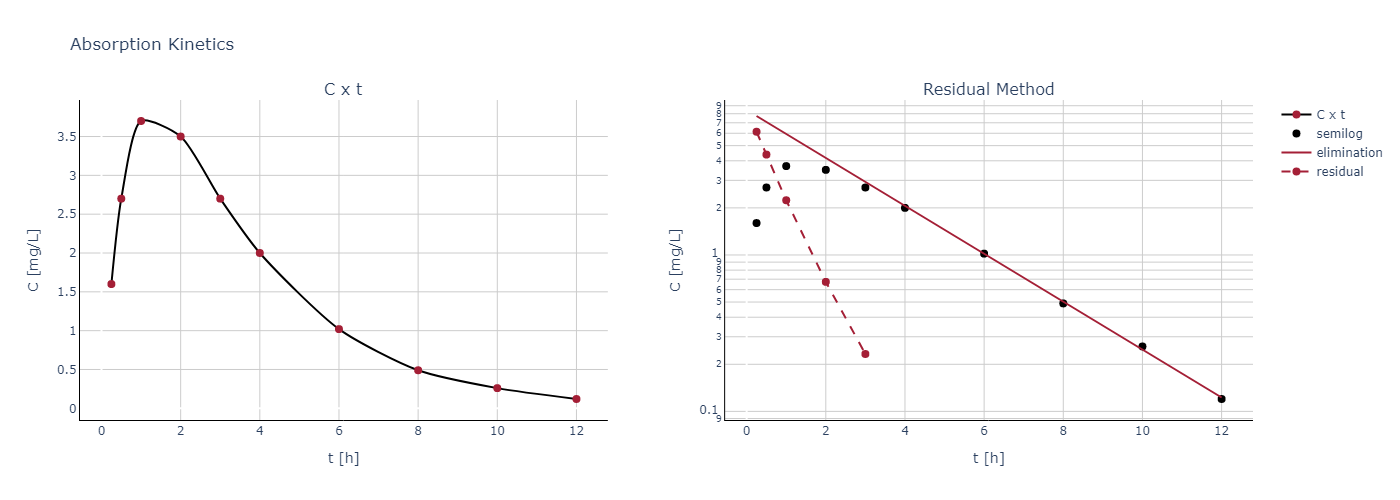


Elimination
k = 0.35 /h
t(1/2) = 1.97 h

Absorption
ka = 1.19 /h
t(1/2) = 0.58 h

AUC = 16.85 mg-h/L
CL = 5.94 L/h
V = 16.83 L



In [2]:
Dose = 100
C = pd.DataFrame({
    't':[0.25,0.5,1,2,3,4,6,8,10,12],
    'C':[1.6,2.7,3.7,3.5,2.7,2.0,1.02,0.49,0.26,0.12]
})

fig = plotly.subplots.make_subplots(cols=2, rows=1,
    subplot_titles=['C x t','Residual Method']
)

# Conventional Plot
fig.add_trace(trace=go.Scatter(
    x=C['t'], y=C['C'], mode='lines+markers', name='C x t',
    marker=dict(color='rgba(164,31,54,1)', size=8), line=dict(color='rgba(0,0,0,1)', shape='spline', smoothing=0.7)
), col=1, row=1)

# Semi Log Plot
fig.add_trace(trace=go.Scatter(
    x=C['t'], y=C['C'], mode='markers', name='semilog',
    marker=dict(color='rgba(0,0,0,1)', size=8),
), col=2, row=1)

# Regression for Elimiation
C['log10(C)'] = np.log10(C['C'])
slope, intercept = np.polyfit(C['t'][6:],C['log10(C)'][6:],1)
k = -slope * np.log(10)
half_life = np.log(2)/k
C['elimination line'] = 10**(C['t']*slope+intercept)
fig.add_trace(trace=go.Scatter(
    x=C['t'], y=C['elimination line'], mode='lines', name='elimination',
    line=dict(color='rgba(164,31,54,1)'),
), col=2, row=1)

# Residual Method
C['residual'] = C['elimination line'] - C['C']
absorption_slope, absorption_intercept = np.polyfit(C['t'][:5], np.log10(np.abs(C['residual']))[:5], 1)
ka = -absorption_slope*np.log(10)
absorption_half_life = np.log(2)/ka
fig.add_trace(trace=go.Scatter(
    x=C['t'][:5], y=C['residual'][:5], mode='lines+markers', name='residual',
    line=dict(color='rgba(164,31,54,1)', dash='dash'), marker=dict(color='rgba(164,31,54,1)', size=8)
), col=2, row=1)

Module_.main_subplot_layout(fig, title='Absorption Kinetics', x='t [h]', y='C [mg/L]', yaxis2_type="log").show()

# Trapezoidal Rule for AUC
AUC = Module_.trapezoidal_rule(x=C['t'], y=C['C'])
CL = Dose/AUC
V = CL/k

print(f'''
Elimination
k = {k :.2f} /h
t(1/2) = {half_life :.2f} h

Absorption
ka = {ka :.2f} /h
t(1/2) = {absorption_half_life :.2f} h

AUC = {AUC :.2f} mg-h/L
CL = {CL :.2f} L/h
V = {V :.2f} L
''')